# ML Engineering Tutorial Part 2
*Tutor: Ralf Mayet (mayet@campus.tu-berlin.de)<br>Adaptive Systems Group, Humboldt University Berlin*

## Content / Goals
  - Build simple regression models with Tensorflow.
  - Build a simple machine learning pipeline (preprocessing, learning, evaluation)
  - Build a classification multi-layer perceptron with Tensorflow.
  - Extend it to use convolutional layers and observe the difference.

## Sources
  - [1] [Tensorflow and Keras Basic Regression](https://www.tensorflow.org/tutorials/keras/regression)
  - [2] [A line-by-line layman’s guide to Linear Regression using TensorFlow](https://towardsdatascience.com/a-line-by-line-laymans-guide-to-linear-regression-using-tensorflow-3c0392aa9e1f) (adapted to TF2)
  - [3] [Tensorflow Documentation: Loading MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)
  - [4] [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)
  - [5] [Simple MNIST Convnet](https://keras.io/examples/vision/mnist_convnet/)




In [1]:
# Importing packages we'll be using
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Helper functions for plotting:
def plotData(X, Y, predictions=None, title="Data Visualization"):
  plt.scatter(X, Y)
  if predictions is not None:
    plt.scatter(X, predictions)
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

def plotImage(image):
  plt.imshow(image)
  plt.colorbar()
  plt.show()

# Part 2A: Re-visiting regression

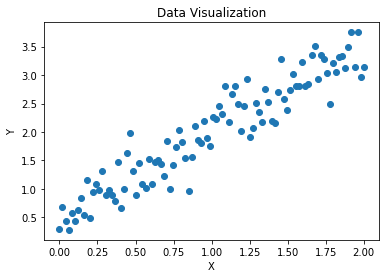

In [3]:
# Generating toy dataset
X = np.linspace(0, 2, 100)

# linear
y = 1.5 * X + np.random.randn(len(X)) * 0.3 + 0.5

# sinusoidal
# y = 1.5 * np.sin(X**2) + np.random.randn(len(X)) * 0.2 + 0.5

# Plot using our utility function
plotData(X, y)

In [4]:
# Making a model
# Ref activation functions: https://www.researchgate.net/profile/Junxi_Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm

model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1)
])

# model = tf.keras.Sequential([
#     layers.Dense(input_shape=[1,], units=1, activation="tanh"),
#     layers.Dense(units=4, activation="tanh"),
#     layers.Dense(units=1)
# ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


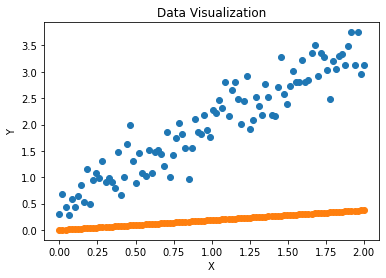

Mean Square Error: 4.17


In [5]:
# Get some example predictions
predictions = model.predict(X)
plotData(X,y,predictions)

meanSquareError = ((y-predictions)**2).mean()
print("Mean Square Error: %.2f" % meanSquareError)

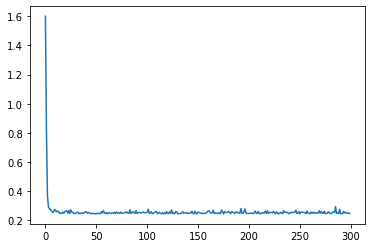

In [6]:
# Train the model
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1), loss='mean_absolute_error')
history = model.fit(X,y, epochs=300, verbose=0)

# Plot the loss
plt.plot(history.history['loss'])
plt.show()

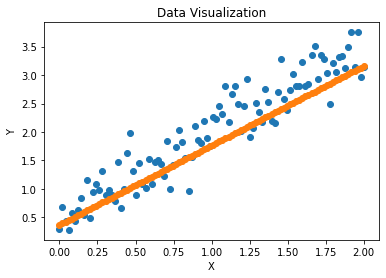

Mean Square Error: 1.58


In [7]:
# Evaluate the final predictions
predictions = model.predict(X)
plotData(X,y,predictions)

meanSquareError = ((y-predictions)**2).mean()
print("Mean Square Error: %.2f" % meanSquareError)

In [8]:
# We can inspect the layer weights after training and observe they 
# match our toy data
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.3958617]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.36874947], dtype=float32)>]

# Part 2B: Loading Images

In [9]:
# Loading MNIST using built-in TF function
# Ref https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
# Inspect dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [16]:
# Printing individual image and label
print(x_train[0,:,:,0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

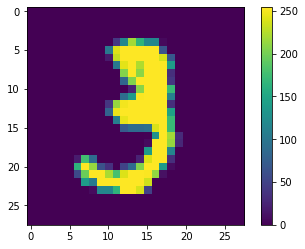

3


In [17]:
# Plotting individual image and label
plotImage(x_train[10,:,:,0])
print(y_train[10])

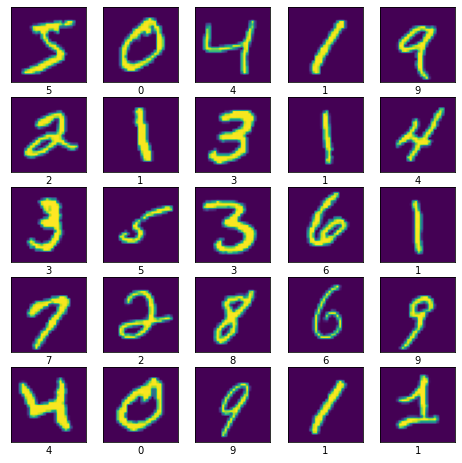

In [18]:
# Plot 25 examples
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i,:,:,0])
    plt.xlabel(y_train[i])
plt.show()

# Part 2C: Classification of Handwritten Digits

In [48]:
# We have our data in x_train, y_train (see above)

# Let's build a model for classification:
model_mlp = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
], name="mnist_mlp_model")

# Convolutional version
model_cnn = tf.keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10)
], name="mnist_cnn_model")

model_mlp.summary()
model_cnn.summary()


Model: "mnist_mlp_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "mnist_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
____________________

In [51]:
# Compile the models
model_mlp.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
# Evaluate Accuracy on test data
_, test_acc_mlp = model_mlp.evaluate(x_test,  y_test, verbose=2)
_, test_acc_cnn = model_cnn.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy MLP:', test_acc_mlp)
print('Test accuracy CNN:', test_acc_cnn)

313/313 - 0s - loss: 178.4816 - accuracy: 0.0743
313/313 - 1s - loss: 59.5878 - accuracy: 0.1430
Test accuracy MLP: 0.07429999858140945
Test accuracy CNN: 0.14300000667572021


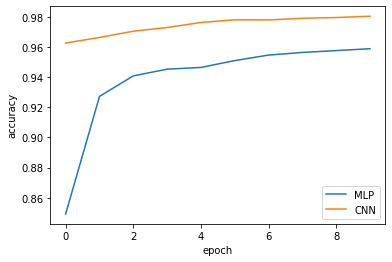

In [62]:
# Fit to data
history_mlp = model_mlp.fit(x_train, y_train, epochs=10)
history_cnn = model_cnn.fit(x_train, y_train, epochs=10)

# Plot the accuracy
plt.plot(history_mlp.history['accuracy'], label="MLP")
plt.plot(history_cnn.history['accuracy'], label="CNN")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [63]:
# Evaluate Accuracy on test data
_, test_acc_mlp = model_mlp.evaluate(x_test,  y_test, verbose=2)
_, test_acc_cnn = model_cnn.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy MLP:', test_acc_mlp)
print('Test accuracy CNN:', test_acc_cnn)

313/313 - 0s - loss: 0.2949 - accuracy: 0.9475
313/313 - 1s - loss: 0.0351 - accuracy: 0.9892
Test accuracy MLP: 0.9474999904632568
Test accuracy CNN: 0.9891999959945679


# Part 2D: Evaluating the classification output

In [65]:
# Get some predictions
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model_cnn, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

print(predictions.shape)
print(predictions[0])

(10000, 10)
[8.0980694e-10 1.4615855e-12 6.3435252e-08 1.2529194e-09 2.2153893e-13
 2.0141029e-12 7.1271722e-19 9.9999988e-01 5.8718716e-12 1.6667334e-08]


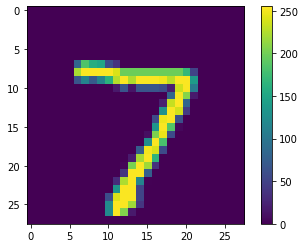

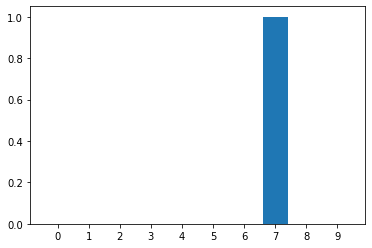

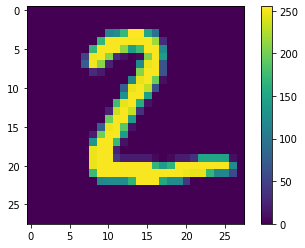

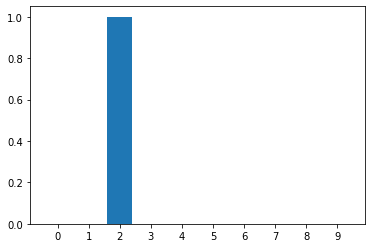

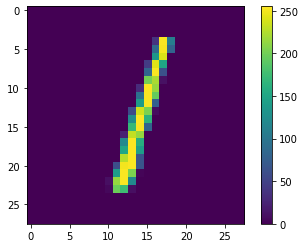

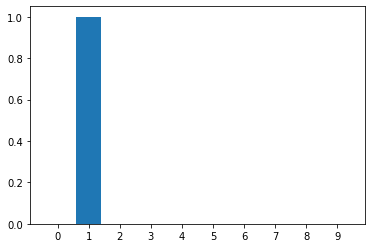

In [68]:
# Plot classification results
for i in range(3):
  plotImage(x_test[i,:,:,0])
  plt.xticks(range(10))
  plt.bar(range(10), predictions[i])
  plt.show()

# Part 2E: Loading images from disk
Demo on Desktop
